# Representation of data submission workflow components based on W3C-PROV

In [1]:
import sys

#sys.path.append('/home/stephan/Repos/ENES-EUDAT/submission_forms')
sys.path.append('C:\\Users\\Stephan Kindermann\\Documents\\GitHub\\submission_forms')

In [2]:
%load_ext autoreload
%autoreload 2

Model is along the concept described in https://www.w3.org/TR/prov-primer/
    

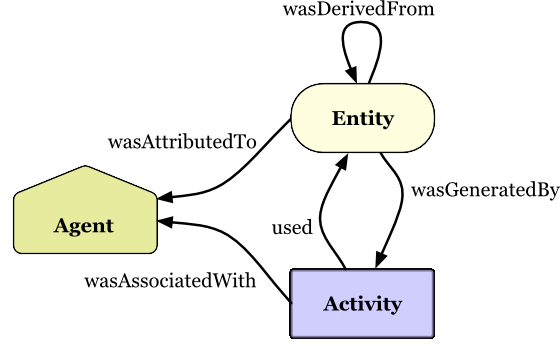

In [3]:
from IPython.display import display, Image
Image(filename='key-concepts.png')

In [4]:
from dkrz_forms import utils
#prov_graph = utils.gen_prov_graph('/home/stephan/tmp/Repos/form_repo/test/test_testsuite_1234.json','all')
prov_graph = utils.gen_prov_graph('C:\\Users\\Stephan Kindermann\\Repos\\form_repo\\test\\test_testsuite_1234.json','all')

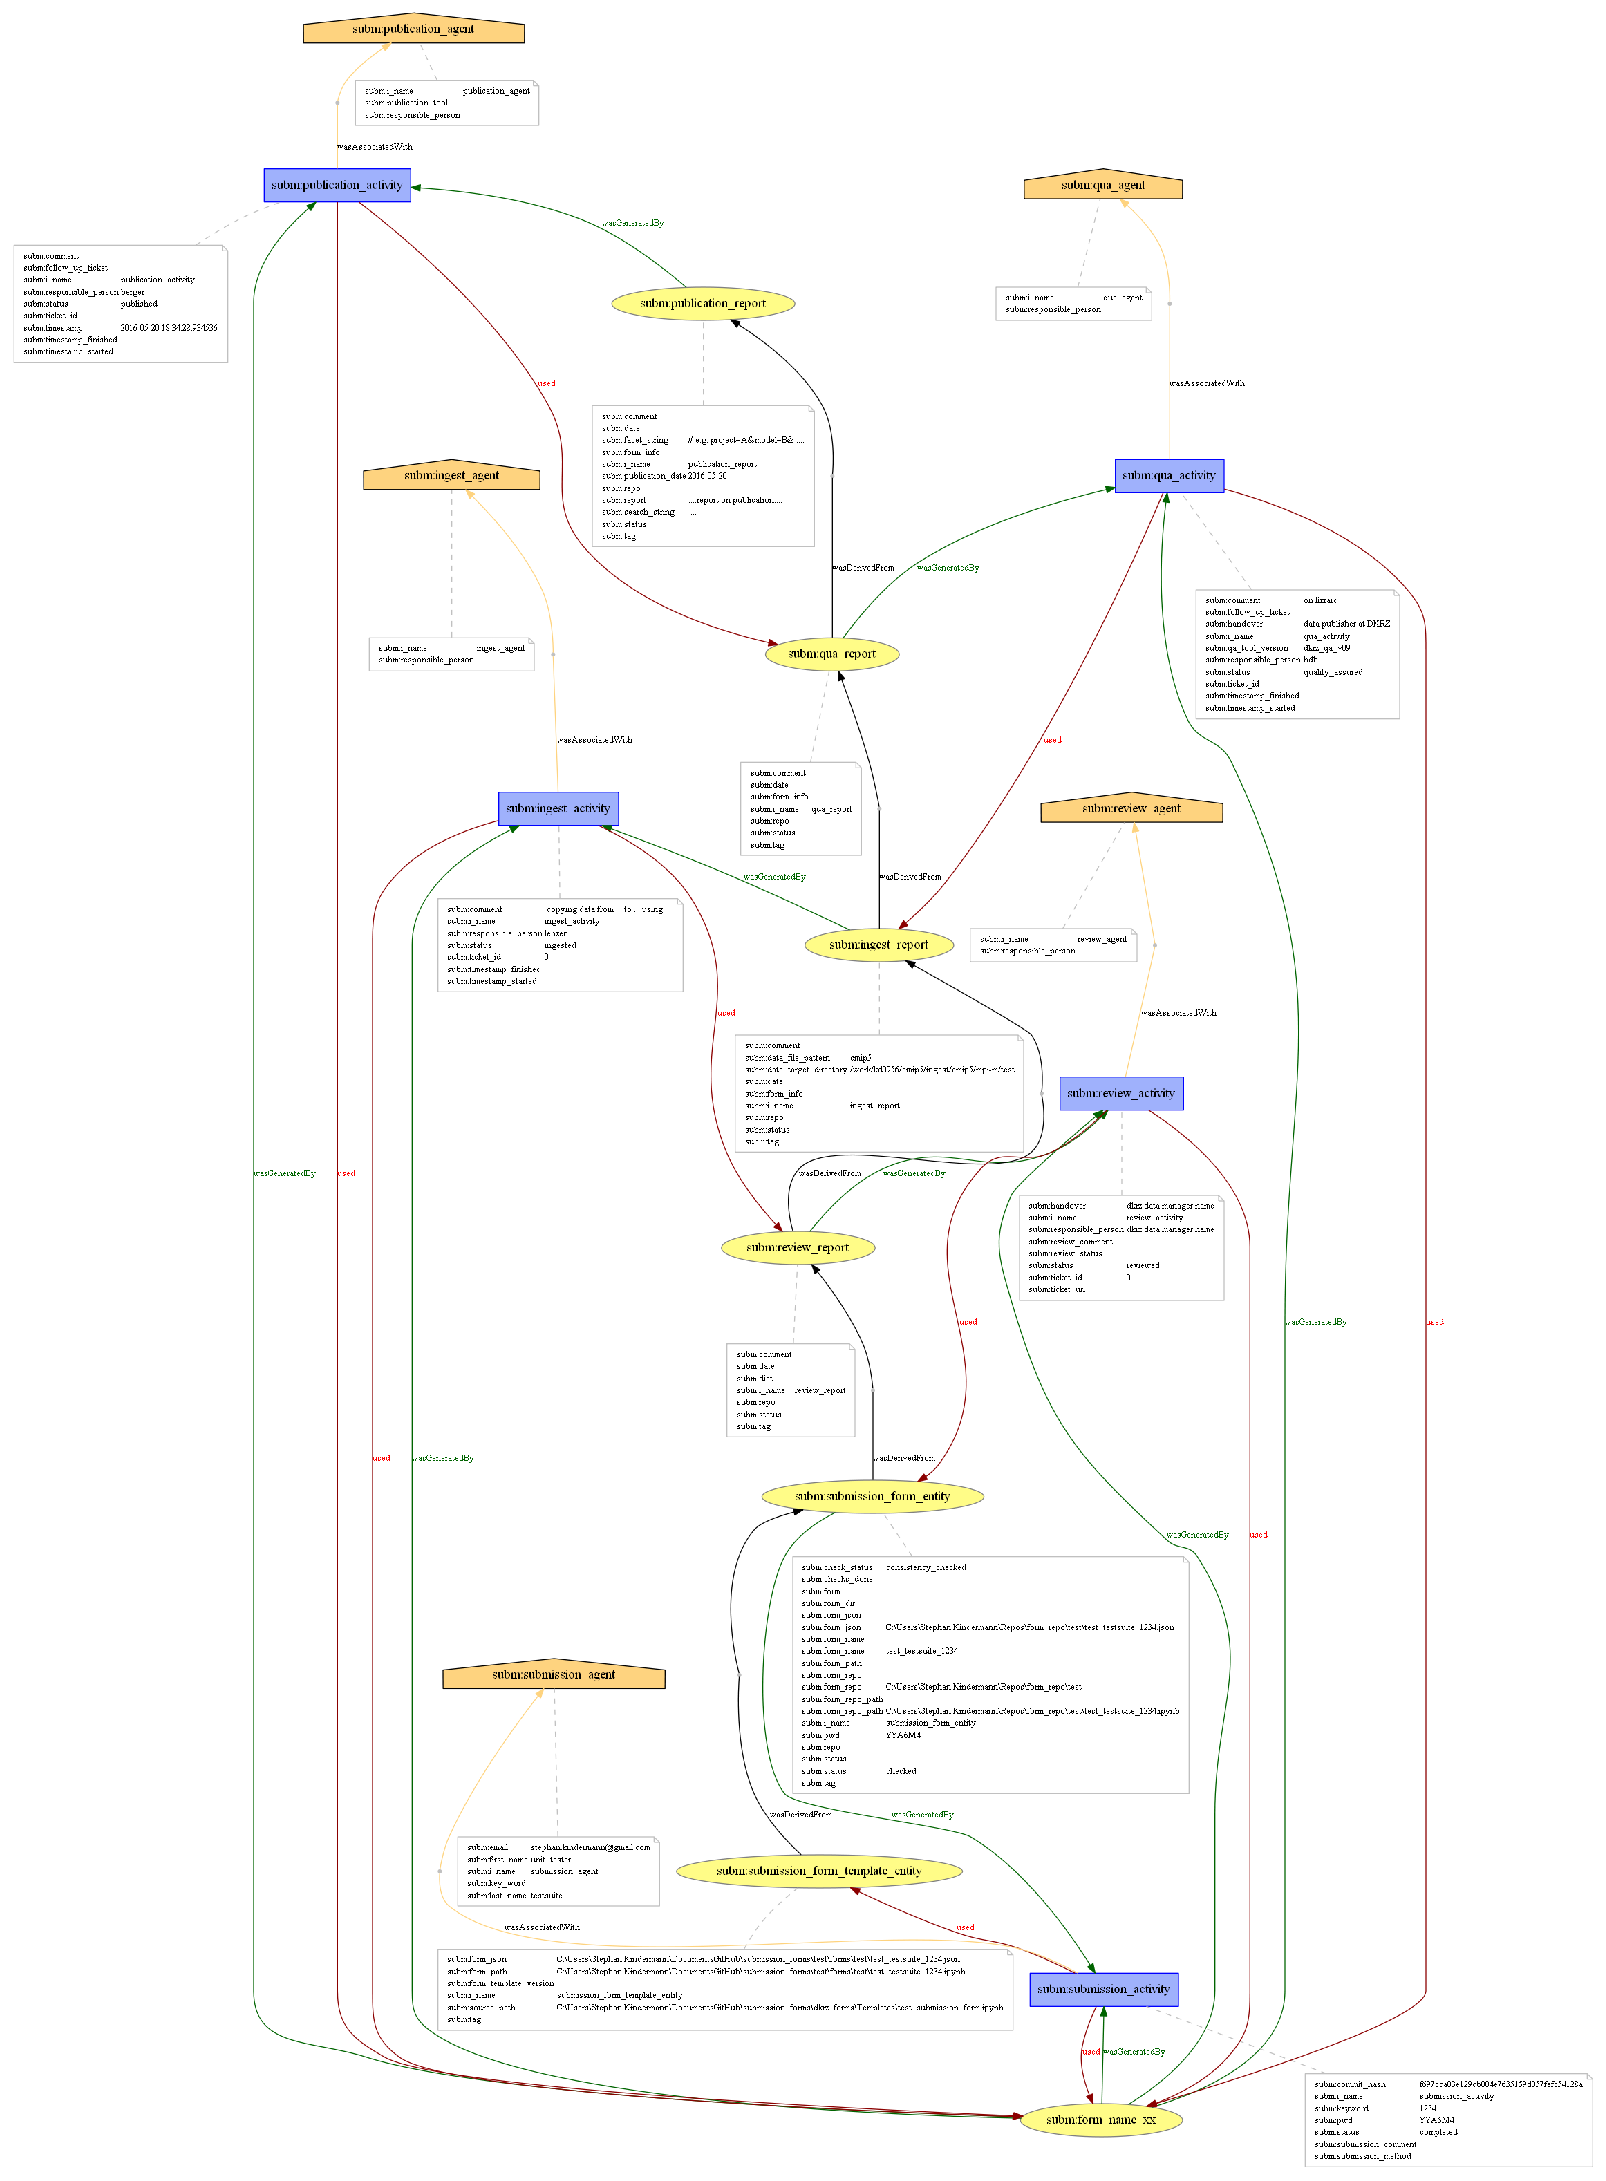

In [5]:
%matplotlib inline
prov_graph.plot()

## Example name spaces 
  (from DOI: 10.3390/ijgi5030038 , mehr unter https://github.com/tsunagun/vocab/blob/master/all_20130125.csv)
    
    owl      Web Ontology Language    http://www.w3.org/2002/07/owl#
    dctype   DCMI Type Vocabulary     http://purl.org/dc/dcmitype/
    dco      DCO  Ontology            http://info.deepcarbon.net/schema#
    prov     PROV Ontology            http://www.w3.org/ns/prov#
    skos     Simple Knowledge
             Organization System      http://www.w3.org/2004/02/skos/core#
    foaf     FOAF Ontology            http://xmlns.com/foaf/0.1/
    vivo     VIVO Ontology            http://vivoweb.org/ontology/core#
    bibo     Bibliographic Ontology   http://purl.org/ontology/bibo/
    xsd      XML Schema Datatype      http://www.w3.org/2001/XMLSchema#
    rdf      Resource Description
             Framework                http://www.w3.org/1999/02/22-rdf-syntax-ns#
    rdfs     Resource Description
             Framework Schema         http://www.w3.org/2000/01/rdf-schema#    

In [ ]:

from dkrz_forms import form_handler
from dkrz_forms.config.project_config import PROJECT_DICT
test_dict = PROJECT_DICT['test']
from dkrz_forms.config.project_config import NAME_SPACES

# add namespaces for submission provenance capture

for key,value in NAME_SPACES.iteritems():
    d1.add_namespace(key,value)

#d1.add_namespace()
# to do: look into some predefined vocabs, e.g. dublin core, iso19139,foaf  etc.

d1.add_namespace("enes_entity",'http://www.enes.org/enes_entitiy#')
d1.add_namespace('enes_agent','http://www.enes.org/enes_agent#')
d1.add_namespace('data_collection','http://www.enes.org/enes_entity/file_collection')
d1.add_namespace('data_manager','http://www.enes.org/enes_agent/data_manager')
d1.add_namespace('data_provider','http://www.enes.org/enes_agent/data_provider')
d1.add_namespace('subm','http://www.enes.org/enes_entity/data_submsission')
d1.add_namespace('foaf','http://xmlns.com/foaf/0.1/')